In [1]:
import pandas as pd
import numpy as np

db = pd.read_csv("data")
db.drop("Unnamed: 0",axis=1,inplace=True)

In [2]:
x = db.iloc[:,:3]
x = np.array(x).T

In [3]:
y = db.iloc[:,-3:]
y = np.array(y).T

In [4]:
def relu(z):
    return z*(z>=0)

def linear(z):
    return z

def der_relu(z):
    return 1*(z>=0)

def der_linear(z):
    return np.ones(z.shape)

## Layer 1 

In [5]:
w1 = np.random.randint(0,99,(10,3))/100
# x = np.random.randint(0,99,(3,1))
b1 = np.random.randint(0,99,(10,1))/100

z1 = w1 @ x + b1
a1 = relu(z1)
a1.shape

(10, 100000)

## Layer 2 

In [6]:
w2 = np.random.randint(0,99,(10,10))/100
b2 = np.random.randint(0,99,(10,1))/100

z2 = w2 @ a1 + b2
a2 = relu(z2)
a2.shape

(10, 100000)

## Layer 3 

In [7]:
w3 = np.random.randint(0,99,(3,10))/100
b3 = np.random.randint(0,99,(3,1))/100

z3 = w3 @ a2 + b3
a3 = linear(z3)
a3.shape

(3, 100000)

## Cost Function 

In [8]:
def cost_fn(y,a):
    np.mean(np.square(a-y))

## Back Propagation

In [9]:
lr = 0.05
epochs = 100

In [10]:
((a3-y) * der_linear(z3)).shape,a2.T.shape

((3, 100000), (100000, 10))

In [11]:
costs=[]

for epoch in range(epochs):
    
    print("Epoch {}: Cost:{}".format(epoch+1,np.mean(np.abs(a3-y))))
    costs += [np.mean(np.abs(a3-y))]
    
    e3 = (a3-y) * der_linear(z3)
    dw3 = e3 @ a2.T
    
    e2 = (w3.T @ e3) * der_relu(z2)
    dw2 = e2 @ a1.T

    e1 = (w2.T @ e2) * der_relu(z1)
    dw1 = e1 @ x.T


    w1 = w1 - (lr/(100000)) * dw1
    w2 = w2 - (lr/(100000)) * dw2
    w3 = w3 - (lr/(100000)) * dw3

    b1 = b1 - (lr/(100000)) * np.sum(e1,axis=1).reshape(10,1)
    b2 = b2 - (lr/(100000)) * np.sum(e2,axis=1).reshape(10,1)
    b3 = b3 - (lr/(100000)) * np.sum(e3,axis=1).reshape(3,1)
    
    z1 = w1 @ x + b1
    a1 = relu(z1)

    z2 = w2 @ a1 + b2
    a2 = relu(z2)
    
    z3 = w3 @ a2 + b3
    a3 = linear(z3)

Epoch 1: Cost:338.45419002360893
Epoch 2: Cost:24.80374733125387
Epoch 3: Cost:23.587070595732662
Epoch 4: Cost:22.43880405738901
Epoch 5: Cost:21.35644684892987
Epoch 6: Cost:20.337366412097804
Epoch 7: Cost:19.37890658642297
Epoch 8: Cost:18.47856519133089
Epoch 9: Cost:17.633671702746938
Epoch 10: Cost:16.84188477330088
Epoch 11: Cost:16.100693484679244
Epoch 12: Cost:15.408259367049007
Epoch 13: Cost:14.763466273369588
Epoch 14: Cost:14.163953135547203
Epoch 15: Cost:13.605809133592144
Epoch 16: Cost:13.086418975446518
Epoch 17: Cost:12.603470245240334
Epoch 18: Cost:12.15601816027741
Epoch 19: Cost:11.742247656037515
Epoch 20: Cost:11.359262368049059
Epoch 21: Cost:11.004652549152045
Epoch 22: Cost:10.676712338367057
Epoch 23: Cost:10.373485502784284
Epoch 24: Cost:10.093137938312141
Epoch 25: Cost:9.834086993402643
Epoch 26: Cost:9.595327031836591
Epoch 27: Cost:9.375569311090313
Epoch 28: Cost:9.173587391043306
Epoch 29: Cost:8.987946546537469
Epoch 30: Cost:8.817415357979922
Ep

## Cost Function through the epochs 

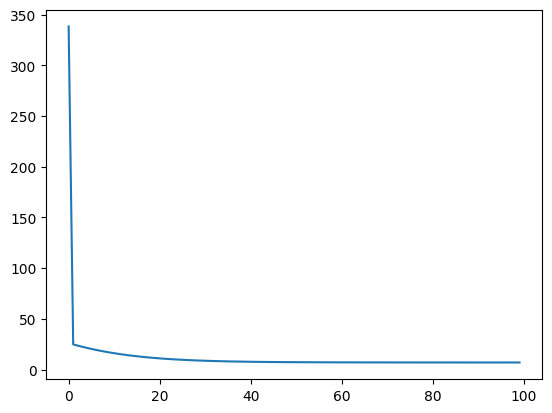

In [12]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(costs)),costs)

In [13]:
def predict(x,y,z):
    
    x = np.array([x,y,z]).reshape(3,1)
    
    z1 = w1 @ x + b1
    a1 = relu(z1)

    z2 = w2 @ a1 + b2
    a2 = relu(z2)
    
    z3 = w3 @ a2 + b3
    a3 = linear(z3)
    
    return a3

lx=[]
ly=[]
lz=[]

def get_array(lx,ly,lz,x=0.4,y=0.4,z=0.4,iterations=10000):
    for i in range(iterations):
        x,y,z = predict(x,y,z)
        lx+=[x]
        ly+=[y]
        lz+=[z]
        
get_array(lx,ly,lz)

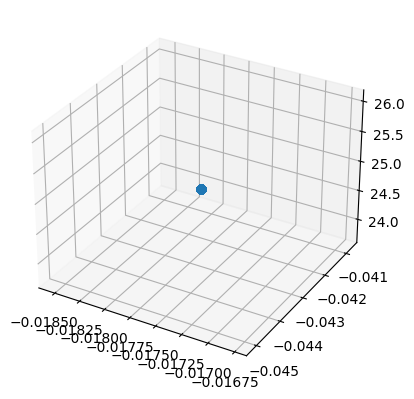

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(np.array(lx).reshape(1,-1)[0],np.array(ly).reshape(1,-1)[0],np.array(lz).reshape(1,-1)[0],'o')

Sadly even though the model seems to be learning and reducing the cost through back propagation, the information and pattern it seems to infer and learn from the dataset is wrong